In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
knn_naive = pd.read_csv("../results/output_places_US_knn_naive.csv")
knn_naive['name'] = "Naive"
seacnn = pd.read_csv("../results/output_places_US_knn_seacnn.csv")
seacnn['name'] = "SEA-CNN"
seacnn_fixed = pd.read_csv("../results/output_places_US_knn_seacnn_fixed.csv")
seacnn_fixed['name'] = "SEA-CNN Opt."
seacnn_fixed_v2 = pd.read_csv("../results/output_places_US_knn_seacnn_fixed_v2.csv")
seacnn_fixed_v2['name'] = "SEA-CNN Opt. v2"

res = pd.concat([
    # knn_naive.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # seacnn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # seacnn_fixed.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    seacnn_fixed_v2.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])

res

,creation_time,search_time,num_queries,name
0,201529945,3112386224,100000,SEA-CNN
1,501365001,19427198080,500000,SEA-CNN
2,915264111,41137690849,1000000,SEA-CNN
3,2124766953,113086358635,2500000,SEA-CNN
4,196569965,2991134750,100000,SEA-CNN
5,391841663,18525305448,500000,SEA-CNN
6,854073245,45217200893,1000000,SEA-CNN
7,2589731441,130187632840,2500000,SEA-CNN
8,197521557,3396567007,100000,SEA-CNN
9,382778963,17382830743,500000,SEA-CNN


In [9]:
# def expName(x):
#     if x == "places":
#         return "0% KNN Queries"
#     elif x == "places_knn_05":
#         return "5% KNN Queries"
#     elif x == "places_knn_10":
#         return "10% KNN Queries"

<AxesSubplot:xlabel='No. of queries', ylabel='Index creation time (sec)'>

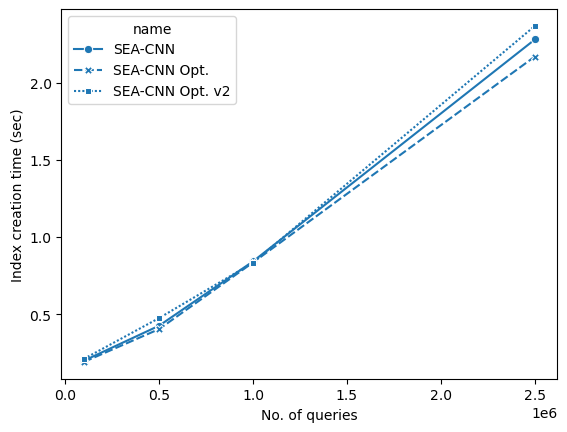

In [10]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

<AxesSubplot:xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

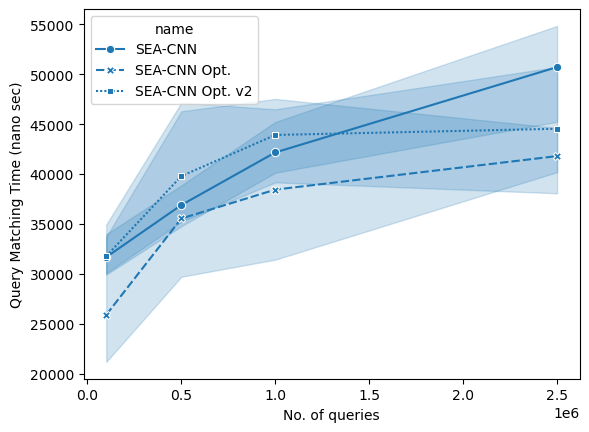

In [13]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', style='name', data=search_res, markers=True)

In [12]:
# Optimization
# - Custom iterator